<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


In [4]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 191.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 124.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 132.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 105.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 167.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 117.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 119.8 MB/s eta 0:00:00


In [5]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


In [7]:
with open('boston_housing_clean.pickle','rb') as f:
    boston  = pd.read_pickle(f)
    df = boston['dataframe']

In [8]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
df.size

7084

In [10]:
df.shape

(506, 14)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [12]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


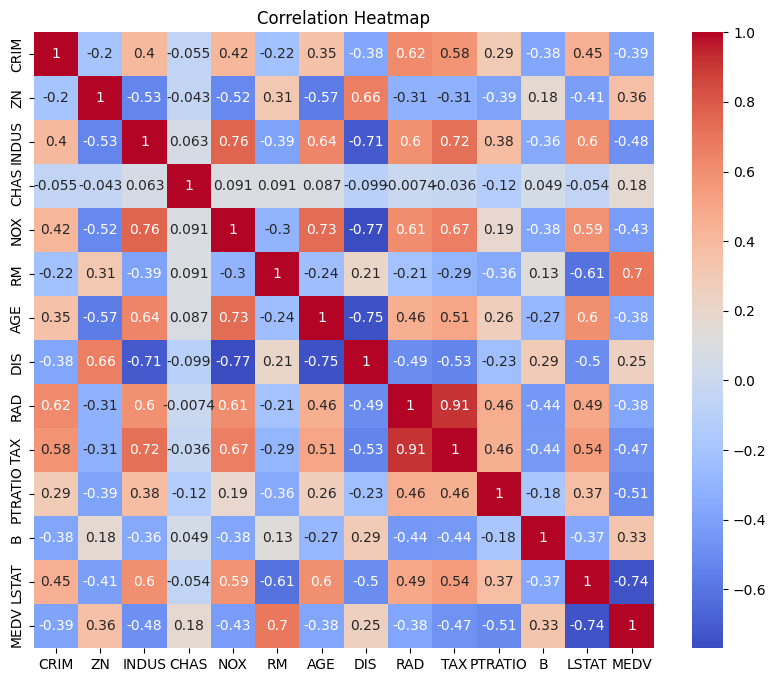

In [14]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
df.corr()["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

In [16]:
# Key Variables
X = df.drop("MEDV", axis=1)

# Target Variables
y = df["MEDV"]

In [17]:
from sklearn.model_selection import train_test_split
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [18]:
# Function for adjusted R2
def adjusted_r2(r2,n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

In [19]:
result = {}

In [20]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
#(a) Simple Linear Regression (RM only)
sm_lin = LinearRegression()
sm_lin.fit(X_train[['RM']],y_train)
sm_lin_pred = sm_lin.predict(X_test[['RM']])

In [21]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [22]:
result["Simple (RM)"] = {
    "R2": r2_score(y_test, sm_lin_pred),
    "Adj_R2": adjusted_r2(r2_score(y_test, sm_lin_pred), X_test.shape[0], 1),
    "RMSE": mean_squared_error(y_test, sm_lin_pred),
    "MAE": mean_absolute_error(y_test, sm_lin_pred),
    "Coef": sm_lin.coef_[0],
    "Intercept": sm_lin.intercept_
}

In [23]:
#(a) Multiple Linear Regression

In [24]:
lr_multi = LinearRegression()
lr_multi.fit(X_train, y_train)
y_pred_multi = lr_multi.predict(X_test)

result["Multiple Linear"] = {
    "R2": r2_score(y_test, y_pred_multi),
    "Adj_R2": adjusted_r2(r2_score(y_test, y_pred_multi), X_test.shape[0], X_train.shape[1]),
    "RMSE": mean_squared_error(y_test, y_pred_multi),
    "MAE": mean_absolute_error(y_test, y_pred_multi),
    "Coef": dict(zip(X.columns, lr_multi.coef_)),
    "Intercept": lr_multi.intercept_
}

In [30]:
# feature scaling
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# ----- (c) Ridge Regression with scaling ----
pipe =Pipeline ([
    ('scaler',StandardScaler()),
    ('ridge',RidgeCV(alphas=np.logspace(-3, 3, 50),cv=5))
])

pipe.fit(X_train,y_train)
y_pred_ridge = pipe.predict(X_test)
ridge_model = pipe.named_steps['ridge']

result["RidgeCV"] = {
    "R2": r2_score(y_test, y_pred_ridge),
    "Adj_R2": adjusted_r2(r2_score(y_test, y_pred_ridge), X_test.shape[0], X_train.shape[1]),
    "RMSE": mean_squared_error(y_test, y_pred_ridge),
    "MAE": mean_absolute_error(y_test, y_pred_ridge),
    "Alpha": ridge_model.alpha_,
    "Coef": dict(zip(X.columns, ridge_model.coef_)),
    "Intercept": ridge_model.intercept_
}

In [29]:
# ----- (d) Lasso Regression with scaling -----
lasso_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', LassoCV(cv=5, random_state=42, max_iter=5000))
])
lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

lasso_model = lasso_pipeline.named_steps['lasso']

result["LassoCV"] = {
    "R2": r2_score(y_test, y_pred_lasso),
    "Adj_R2": adjusted_r2(r2_score(y_test, y_pred_lasso), X_test.shape[0], X_train.shape[1]),
    "RMSE": mean_squared_error(y_test, y_pred_lasso),
    "MAE": mean_absolute_error(y_test, y_pred_lasso),
    "Alpha": lasso_model.alpha_,
    "Coef": dict(zip(X.columns, lasso_model.coef_)),
    "Intercept": lasso_model.intercept_
}

In [37]:
# Results summary
results_df = pd.DataFrame(result).T
print("\n=== Model Comparison ===\n", results_df[["R2","Adj_R2","RMSE","MAE"]])



=== Model Comparison ===
                        R2    Adj_R2       RMSE       MAE
Simple (RM)      0.370757  0.364464  46.144775  4.478336
Multiple Linear  0.668483  0.619508  24.311427  3.191509
LassoCV          0.668119  0.619091  24.338081  3.185743
RidgeCV            0.6677   0.61861  24.368825   3.18425


In [41]:
# 4. Key Findings
# ======================================================
# - Inspect coefficients of the best model (highest R2 or lowest RMSE).
best_model = results_df.sort_values("R2", ascending=False).head(1)
print("\nBest Model:\n", best_model)




Best Model:
                        R2    Adj_R2       RMSE       MAE  \
Multiple Linear  0.668483  0.619508  24.311427  3.191509   

                                                              Coef  Intercept  \
Multiple Linear  {'CRIM': -0.1124634807359644, 'ZN': 0.03008101...  30.288948   

                Alpha  
Multiple Linear   NaN  


/tmp/ipykernel_300/306382611.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coef_series.values, y=coef_series.index, palette="viridis")


Text(0, 0.5, 'Feature')

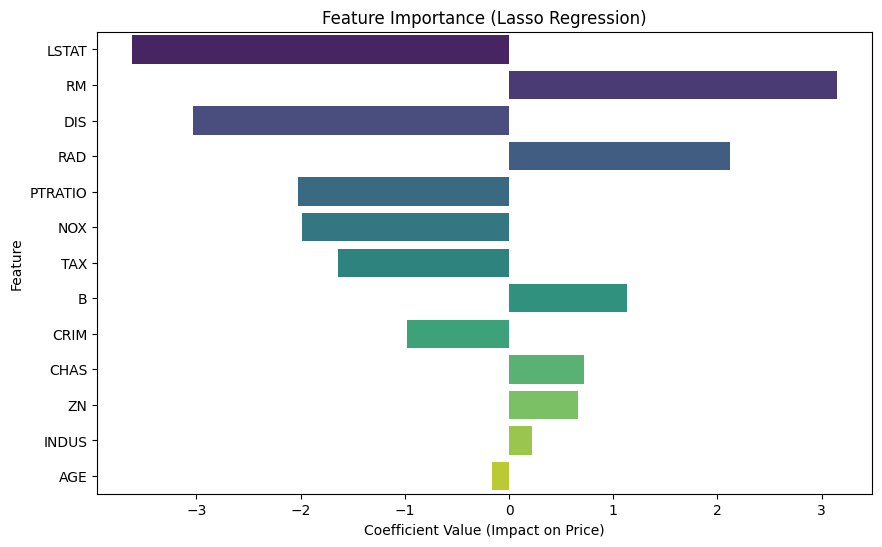

In [46]:
# Feature importance plot (for Lasso/Ridge/Multiple)
coef_series = pd.Series(result["LassoCV"]["Coef"])   # coefficients as Series
coef_series = coef_series.sort_values(key=abs, ascending=False)  # sort by importance

# --- Step 2: Plot feature importance ---
plt.figure(figsize=(10,6))
sns.barplot(x=coef_series.values, y=coef_series.index, palette="viridis")
plt.title("Feature Importance (Lasso Regression)")
plt.xlabel("Coefficient Value (Impact on Price)")
plt.ylabel("Feature")


### observation 
.(RM): More rooms strongly increase house prices.

.(lower status population): Higher values strongly decrease house prices.

.NOX (pollution) and PTRATIO (pupil-teacher ratio): Higher values negatively impact house prices.

.CHAS (proximity to river): Houses near the river are valued slightly higher.

### suggestion
.Affordable housing programs should focus on areas with high LSTAT, while urban policies improving environmental quality (NOX) and school quality (PTRATIO) can significantly boost property values.

### Limitations:

Multicollinearity exists (e.g., TAX and RAD are correlated).

Linear regression assumes normality, linearity, and homoscedasticity, which may not hold perfectly.

### Next Steps:

Use regularization (Ridge/Lasso) or tree-based models for more robustness.

Apply feature engineering (e.g., interaction terms, polynomial features).

Validate results on modern housing datasets.
